In [1]:
%%HTML
<style>
.box {
    border: 1px double dodgerblue;
    padding: 5px;
}
.note {
    font-size: 20;
    color: teal;
    font-weight: bold;
}
.highlight {
    color: green;
    font-family: verdana;
}
.tag {
    background: red;
    color: white;
    padding: 3px;
}
.warning {
    background: red;
    padding: 12px;
    font-size: 24px;
    color: white;
    text-align: center;
    font-family: verdana;
}
.symbol {
    color: white;
    background: green;
    font-size: 20px;
    padding: 2px;
}
</style>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()
import mglearn

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


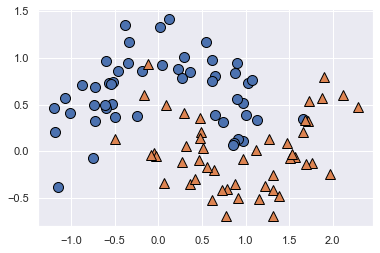

In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
X, y = make_moons(100, noise = .25, random_state = 3)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

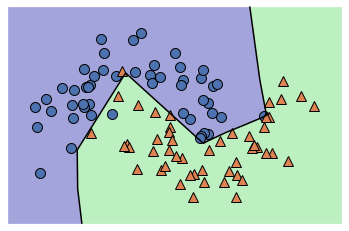

In [19]:
clf = MLPClassifier(hidden_layer_sizes=[10], solver = 'lbfgs')
MLPClassifier?
clf.fit(X, y)
mglearn.plots.plot_2d_separator(clf, X)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
mglearn.plots.plot_2d_classification(clf, X, alpha = .3, fill = True)

To make the decision boundary more smooth, we can 
increase the complexity of the model by <b>increasing the number of layers</b>, use <b>tanh</b> activation

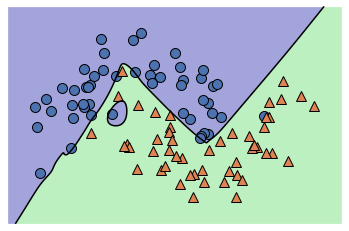

In [21]:
clf = MLPClassifier(hidden_layer_sizes = (10, 10), activation = 'tanh', solver = 'lbfgs', random_state = 1)
clf.fit(X, y)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
mglearn.plots.plot_2d_separator(clf, X)
mglearn.plots.plot_2d_classification(clf, X, alpha = .3)

## Regularization: L2 penalty

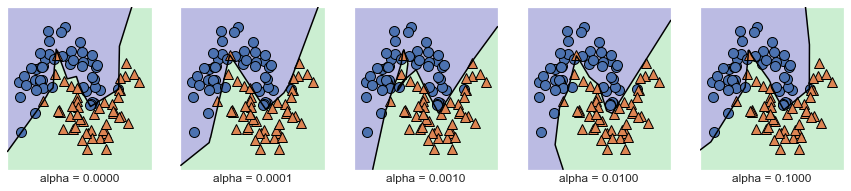

In [30]:
fig, axes = plt.subplots(1,5,subplot_kw = {'xticks' : [], 'yticks' : []}, figsize = (15, 3))
for i, ax in enumerate(axes):
    alpha = 10 ** (-5 + i)
    clf = MLPClassifier(hidden_layer_sizes=[10, 10], solver = 'lbfgs', alpha = alpha)
    clf.fit(X, y)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax = ax)
    mglearn.plots.plot_2d_separator(clf, X, ax = ax)
    mglearn.plots.plot_2d_classification(clf, X, alpha = .2, ax = ax)
    ax.set_xlabel('alpha = %.4f' % alpha)
    

<p class = 'note'>We can see that as we increase <code>alpha</code>, the decision boundary will be more simple</p>

## Example: Breast Cancer Dataset

In [31]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 66)

In [32]:
clf = MLPClassifier()
clf.fit(x_train, y_train)
print('Train score: %.2f' % clf.score(x_train, y_train))
print('Test score: %.2f' % clf.score(x_test, y_test))

Train score: 0.92
Test score: 0.92


<p class ='note'>MLPClassifier performs quite well, but not as good as the other models</p>

<h3 class = 'warning'>The importance of Feature scaling</h3>

In [66]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(cancer.data) #mean = 0, variance = 1
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)


In [70]:
clf = MLPClassifier(random_state = 0)
clf.fit(x_train, y_train)
print('Train score: %.2f' % clf.score(x_train, y_train))
print('Test score: %.2f' % clf.score(x_test, y_test))

Train score: 0.93
Test score: 0.93


<h2>Strength, weakness and parameters</h2>
<p class = 'box'>
    <b>Strength:</b><br>
     they are able to capture infor‐
mation contained in large amounts of data and build incredibly complex models.
Given enough computation time, data, and careful tuning of the parameters, neural
networks often beat other machine learning algorithms (for classification and regres‐
sion tasks).
 they are able to capture infor‐
mation contained in large amounts of data and build incredibly complex models.
Given enough computation time, data, and careful tuning of the parameters, neural
networks often beat other machine learning algorithms (for classification and regres‐
sion tasks).
</p>

<p class = 'box'>
    <b>Weakness:</b><br>
    - Might take a long time to train
    - Work best for "homogeneous" data 
    (for data that has different kind of features, tree-based model might be a better choice)
</p>